In [0]:
# Usando a API Alpha vantage (gratuita) para dados do mercado financeiro
# Voce precisa se registarr em https://www.alphavantage.co/ para obter uma API Key gratuita
API_KEY = "senha da api"

In [0]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [0]:
def get_stock_data(symbol="IBM"):
    # FUNÇÃO PARA OBTER DADOS HISTÓRICOS DE AÇÕES

    base_url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "apikey": API_KEY,
        "outputsize": "compact"
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        # Verificações de erro na resposta
        if "error message" in data:
            print(f"Erro da API: {data['error message']}")
            return None
        
        if "Note" in data:
            print(f"Aviso da API: {data['Note']}")
            return None
        
        if "Time Series (Daily)" not in data:
            print(f"Erro: Dados não encontrados para {symbol}")
            print("Resposta da API:", data)
            return None

        # Converter dados para DataFrame
        df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index")
        df.columns = [col.split(". ")[1] for col in df.columns]  # renomear colunas
        df.index = pd.to_datetime(df.index)  # transformar o índice em datetime
        df = df.sort_index()  # ordenar pela data
        df.reset_index(inplace=True)
        df.rename(columns={"index": "date"}, inplace=True)

        # Converter colunas numéricas
        for col in df.columns:
            if col != "date":
                df[col] = pd.to_numeric(df[col], errors='coerce')

        if df.empty:
            print(f"Aviso: DataFrame vazio para {symbol}")
            return None

        return df

    except requests.exceptions.RequestException as e:
        print(f"Erro na conexão: {str(e)}")
        return None
    except ValueError as e:
        print(f"Erro ao processar os dados: {str(e)}")
        return None
    except Exception as e:
        print(f"Erro inesperado: {str(e)}")
        return None


date,open,high,low,close,volume
2024-12-17T00:00:00Z,229.23,230.2,227.62,228.97,3651346
2024-12-18T00:00:00Z,229.035,229.035,220.03,220.17,4152517
2024-12-19T00:00:00Z,224.42,226.2,222.98,223.92,4430120
2024-12-20T00:00:00Z,222.73,227.6847,221.68,223.36,12423200
2024-12-23T00:00:00Z,222.81,223.74,221.08,221.93,2988137


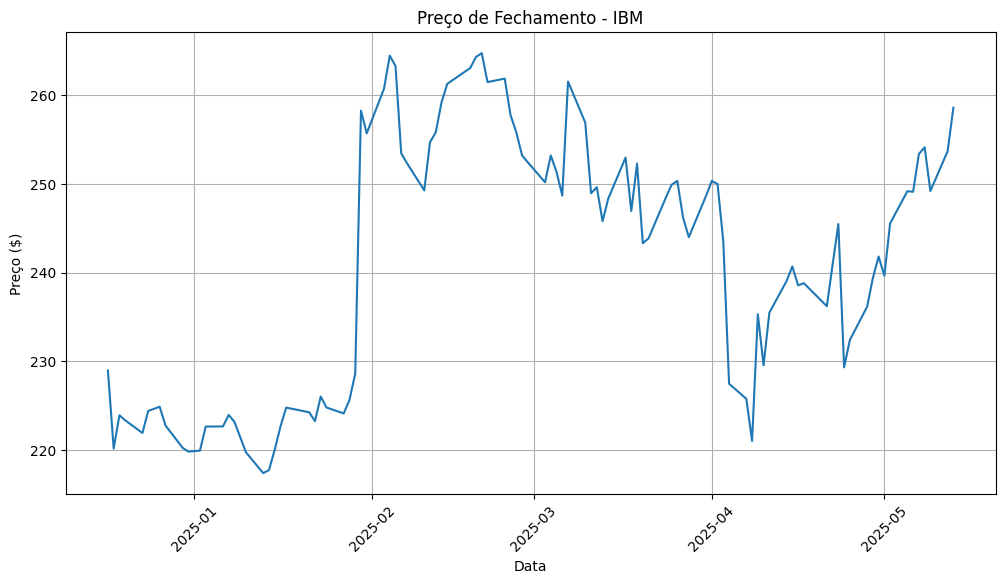

In [0]:
# Exemplo de uso
symbol = "IBM"
df = get_stock_data(symbol)

if df is not None:
    try:
        display(df.head())  # display específico para Databricks

        # Criar gráfico simples
        plt.figure(figsize=(12, 6))
        plt.plot(df['date'], df['close'])
        plt.title(f"Preço de Fechamento - {symbol}")
        plt.xlabel("Data")
        plt.ylabel("Preço ($)")
        plt.grid(True)
        plt.xticks(rotation=45)
        display(plt.show())  # mostrar no Databricks
    except Exception as e:
        print(f"Erro ao exibir dados: {str(e)}")


date,open,high,low,close,volume
2024-12-17T00:00:00Z,4.71,4.71,4.66,4.67,4767974
2024-12-18T00:00:00Z,4.69,4.76,4.57,4.58,5111935
2024-12-19T00:00:00Z,4.59,4.6,4.53,4.54,2960466
2024-12-20T00:00:00Z,4.49,4.555,4.48,4.51,5568828
2024-12-23T00:00:00Z,4.48,4.51,4.46,4.5,3506037


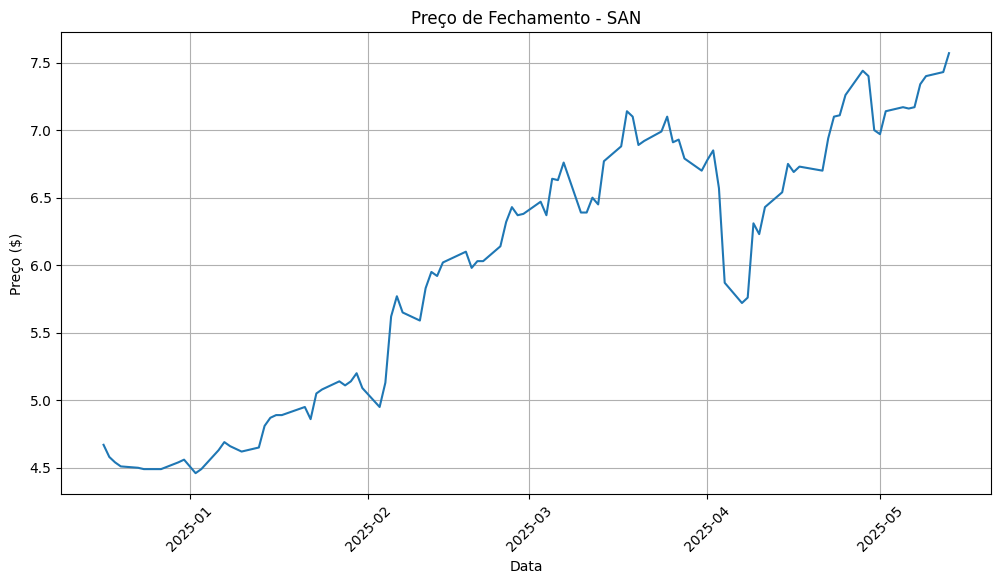

In [0]:
# Exemplo de uso
symbol = "SAN"
df = get_stock_data(symbol)

if df is not None:
    try:
        display(df.head())  # display específico para Databricks

        # Criar gráfico simples
        plt.figure(figsize=(12, 6))
        plt.plot(df['date'], df['close'])
        plt.title(f"Preço de Fechamento - {symbol}")
        plt.xlabel("Data")
        plt.ylabel("Preço ($)")
        plt.grid(True)
        plt.xticks(rotation=45)
        display(plt.show())  # mostrar no Databricks
    except Exception as e:
        print(f"Erro ao exibir dados: {str(e)}")

date,open,high,low,close,volume
2024-12-17T00:00:00Z,60.85,61.35,59.3201,61.25,5141349
2024-12-18T00:00:00Z,60.833,61.53,58.24,58.8,7498766
2024-12-19T00:00:00Z,58.33,59.565,57.88,58.91,5903672
2024-12-20T00:00:00Z,57.92,60.17,57.49,60.11,8456404
2024-12-23T00:00:00Z,60.44,60.63,59.05,59.27,4592649


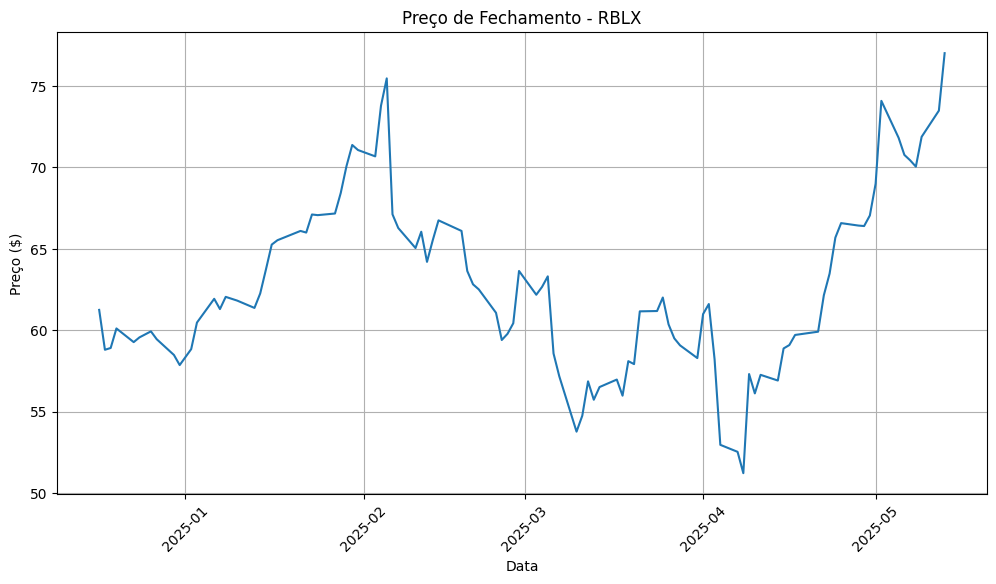

In [0]:
# Exemplo de uso
symbol = "RBLX"
df = get_stock_data(symbol)

if df is not None:
    try:
        display(df.head())  # display específico para Databricks

        # Criar gráfico simples
        plt.figure(figsize=(12, 6))
        plt.plot(df['date'], df['close'])
        plt.title(f"Preço de Fechamento - {symbol}")
        plt.xlabel("Data")
        plt.ylabel("Preço ($)")
        plt.grid(True)
        plt.xticks(rotation=45)
        display(plt.show())  # mostrar no Databricks
    except Exception as e:
        print(f"Erro ao exibir dados: {str(e)}")

date,open,high,low,close,volume
2024-12-17T00:00:00Z,921.54,928.45,916.42,919.13,2459456
2024-12-18T00:00:00Z,919.13,922.44,886.56,889.55,2938194
2024-12-19T00:00:00Z,908.18,912.6215,899.0,902.04,2815512
2024-12-20T00:00:00Z,893.21,919.9238,890.4872,909.05,4530519
2024-12-23T00:00:00Z,913.42,915.0,899.1001,911.45,2339375


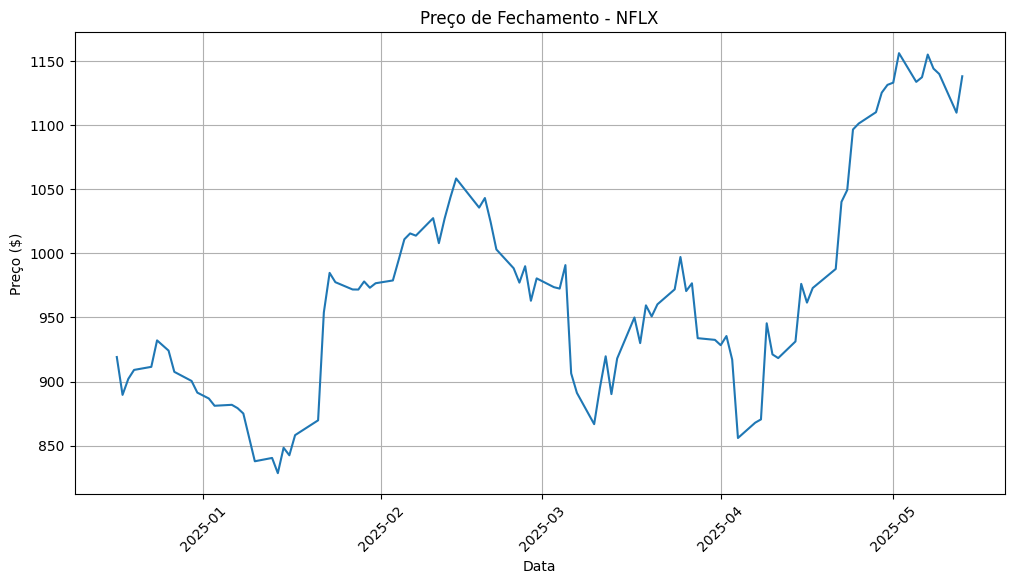

In [0]:
# Exemplo de uso
symbol = "NFLX"
df = get_stock_data(symbol)

if df is not None:
    try:
        display(df.head())  # display específico para Databricks

        # Criar gráfico simples
        plt.figure(figsize=(12, 6))
        plt.plot(df['date'], df['close'])
        plt.title(f"Preço de Fechamento - {symbol}")
        plt.xlabel("Data")
        plt.ylabel("Preço ($)")
        plt.grid(True)
        plt.xticks(rotation=45)
        display(plt.show())  # mostrar no Databricks
    except Exception as e:
        print(f"Erro ao exibir dados: {str(e)}")

In [0]:
# Salvar dados em Parquet no Blob Storage da Databricks elenir-oliveira
symbol = "RBLX"
df_rblx = get_stock_data(symbol)

if df_rblx is not None:
    try:
        spark_df_rblx = spark.createDataFrame(df_rblx)
        spark_df_rblx.write.mode("overwrite").parquet("dbfs:/mnt/blob/rblx_stock_data.parquet")
    except Exception as e:
        print(f"Erro ao salvar dados RBLX: {str(e)}")

symbol = "NFLX"
df_nflx = get_stock_data(symbol)

if df_nflx is not None:
    try:
        spark_df_nflx = spark.createDataFrame(df_nflx)
        spark_df_nflx.write.mode("overwrite").parquet("dbfs:/mnt/blob/nflx_stock_data.parquet")
    except Exception as e:
        print(f"Erro ao salvar dados NFLX: {str(e)}")